# <center> ARIMA Models
## Auto-Regressive (exogenous) Inputs Moving Average model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import time

In [2]:
#import data and remove principal components from dataframes
minute = pd.read_excel('ml_dataset.xlsx',sheet_name='Minute', index_col=0, parse_dates=True)
del minute['PC-1']
del minute['PC-2']
hour = pd.read_excel('ml_dataset.xlsx',sheet_name='Hour', index_col=0, parse_dates=True)
del hour['PC-1']
del hour['PC-2']
day = pd.read_excel('ml_dataset.xlsx',sheet_name='Day', index_col=0, parse_dates=True)
del day['PC-1']
del day['PC-2']
week = pd.read_excel('ml_dataset.xlsx',sheet_name='Week', index_col=0, parse_dates=True)
del week['PC-1']
del week['PC-2']
month = pd.read_excel('ml_dataset.xlsx',sheet_name='Month', index_col=0, parse_dates=True)
del month['PC-1']
del month['PC-2']

# <center> Seasonal ARIMA Model (SARIMAX)

## SARIMA model predicts the entire year at once. Only monthly, weekly, and daily predictions are performed due to inefficiency with large datasets.

In [3]:
def model_sarimax(x, order, split): 
    """
    :param x: timeseries data
    :param order: prediction horizon
    :param split: training split
    """
    #split data
    train = x.values[0:split]
    test = x.values[split:]
    #create SARIMA model
    model = SARIMAX(train, order=(0,0,1), seasonal_order = (1,0,0,order)).fit()
    #Make prediction
    predictions = model.predict(start=len(train),end=(len(x)-1))
    #calculate rmse
    rmse = sqrt(mean_squared_error(test, predictions))
    print(f'Test RMSE: {rmse}')

    return model, predictions, rmse   

In [4]:
def plot_SARIMAX(x, timestep): 
    """
    :param x: timeseries data
    :param timestep: timeseries intervals
    """
    fig1, ax1 = plt.subplots(1,1,figsize=(15,10), facecolor='w', edgecolor='k')
    plt.rcParams.update({'font.size': 18})
    ax1.plot(x['grid'],'g',label='Actual')
    ax1.plot(x['arima'],'b',label='Prediction')
    ax1.set_ylabel('Normalized Energy Consumption')
    ax1.legend(loc=4, prop={'size': 20})
    ax1.set_title(f'SARIMA {timestep.title()} Predictions')
    ax1.set_xlabel(f'{timestep.title()} Intervals')

# <center> Monthly Prediction

/Users/davisgiles/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/var/folders/kn/v58htfb13v3b7_c6dcyc8r2m0000gn/T/ipykernel_73297/1370323580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_arima['arima'] = month_pred


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41281D+00    |proj g|=  1.69279D+00

At iterate    5    f= -7.91060D-02    |proj g|=  4.93848D+00

At iterate   10    f= -3.83793D-01    |proj g|=  1.07816D+00

At iterate   15    f= -3.88883D-01    |proj g|=  1.64109D-01

At iterate   20    f= -3.98204D-01    |proj g|=  1.83289D+00

At iterate   25    f= -4.43771D-01    |proj g|=  6.35447D-01

At iterate   30    f= -4.46748D-01    |proj g|=  6.39182D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

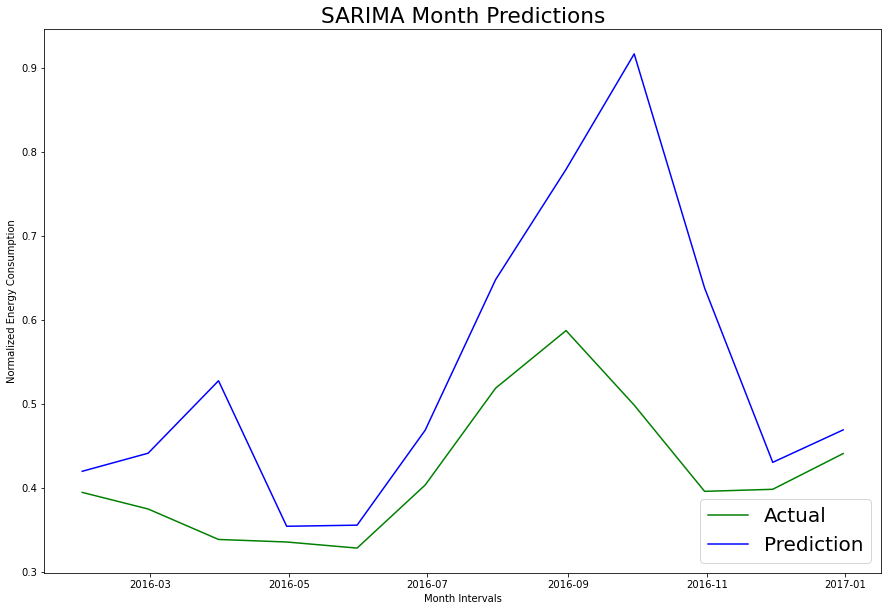

In [5]:
#SARIMA Monthly Forecasting, 36 months total
month_mod, month_pred, month_rmse = model_sarimax(month, 12, 24)
month_arima = month[24:]
month_arima['arima'] = month_pred
plot_SARIMAX(month_arima,'month')

# <center> Weekly Prediction

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26946D+00    |proj g|=  1.66033D+00

At iterate    5    f=  6.20932D-02    |proj g|=  4.70530D-01

At iterate   10    f=  5.79751D-02    |proj g|=  2.49360D-01

At iterate   15    f=  1.40577D-02    |proj g|=  2.16065D+00

At iterate   20    f= -3.52193D-02    |proj g|=  7.47962D-01

At iterate   25    f= -3.90388D-02    |proj g|=  1.59635D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     50      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/kn/v58htfb13v3b7_c6dcyc8r2m0000gn/T/ipykernel_73297/2805248888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_arima['arima'] = week_pred


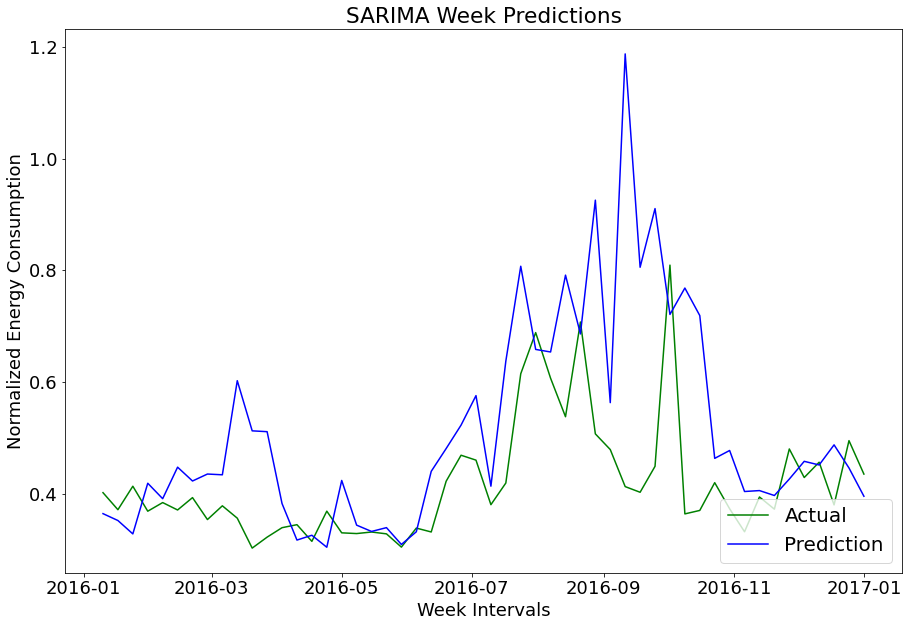

In [6]:
#SARIMA Weekly Forecasting, 157 weeks total
week_mod, week_pred, week_rmse = model_sarimax(week, 52, 105)
week_arima = week[105:]
week_arima['arima'] = week_pred
plot_SARIMAX(week_arima, 'week')

# <center> Daily Predictions

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27679D+00    |proj g|=  8.60884D-01

At iterate    5    f=  1.72481D-01    |proj g|=  3.27659D-01

At iterate   10    f= -4.30278D-02    |proj g|=  5.56970D-02

At iterate   15    f= -4.37596D-02    |proj g|=  1.23713D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     27      1     0     0   5.195D-06  -4.376D-02
  F =  -4.3759618444867601E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Test RMS

/var/folders/kn/v58htfb13v3b7_c6dcyc8r2m0000gn/T/ipykernel_73297/1369141846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_arima['arima'] = day_pred


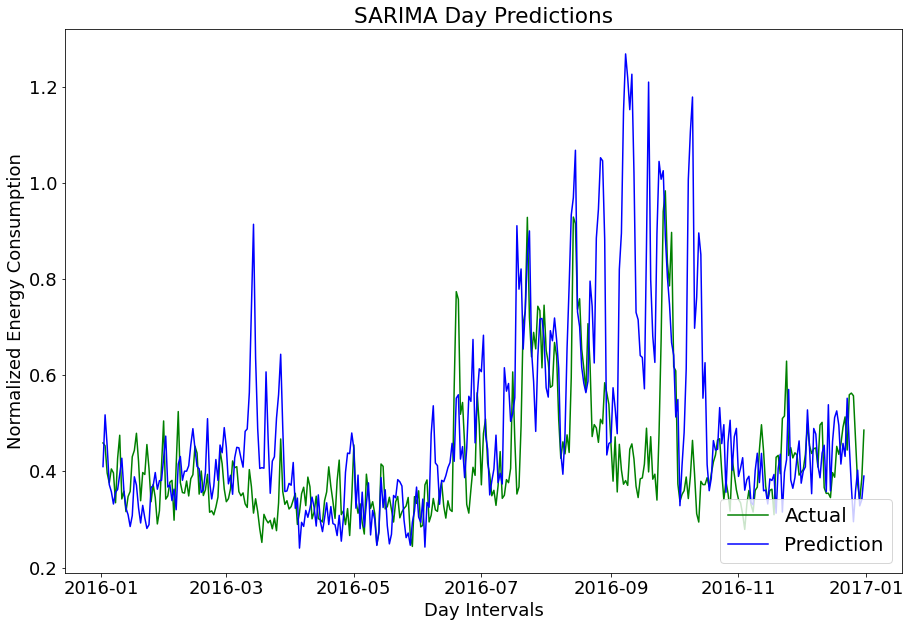

In [7]:
#SARIMA Daily Forecasting, 1096 days total
day_mod, day_pred, day_rmse = model_sarimax(day, 365, 731)
day_arima = day[731:]
day_arima['arima'] = day_pred
plot_SARIMAX(day_arima, 'day')

# <center> Rolling ARIMA Forecast
## Utilizes the previous timestep as an instance of training data, so the algorithm is only predicting one timestep ahead, instead of the whole year at once. Only monthly, weekly, and daily predictions are performed due to inefficiency with large datasets.

In [8]:
def model_rolling_forecast(test_df, train_list):
    """
    :param test_df: dataframe of test values
    :param train_list: list of training values
    """
    predictions = []
    for t in range(len(test_df)):
        #create ARIMA model
        model = ARIMA(train_list, order=(3,1,1))
        #fit the model 
        model_fit = model.fit()
        #forcast a prediction
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        #Add test value to training list
        obs = test_df[t]
        train_list.append(obs)

    #Create Dataframe of Forecast
    predictions = pd.Series(predictions)
    #Evaluate RMSE
    rmse = sqrt(mean_squared_error(test_df, predictions))
    print(f'Test RMSE: {rmse}')
    return model, predictions, rmse

In [9]:
def plot_ARIMA(x, timestep): 
    """
    :param x: timeseries data
    :param timestep: timeseries intervals
    """
    fig1, ax1 = plt.subplots(1,1,figsize=(15,10), facecolor='w', edgecolor='k')
    plt.rcParams.update({'font.size': 18})
    ax1.plot(x['grid'],'g', label='Actual')
    ax1.plot(x['arima'],'b', label='Prediction')
    ax1.set_ylabel('Normalized Energy Consumption')
    ax1.legend(loc=4, prop={'size': 20})
    ax1.set_title(f'Rolling Forecast ARIMA {timestep.title()} Predictions')
    ax1.set_xlabel(f'{timestep.title()} Intervals')

# <center> Monthly Predictions

In [10]:
#Split data, 36 months total
month_train = month.values[0:24].tolist()
month_test = month.values[24:]

/Users/davisgiles/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/davisgiles/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/davisgiles/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/davisgiles/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/davisgiles/opt/anaconda3/

Test RMSE: 0.07186933795407338


/var/folders/kn/v58htfb13v3b7_c6dcyc8r2m0000gn/T/ipykernel_73297/1472121058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_arima['arima'] = month_pred.tolist()


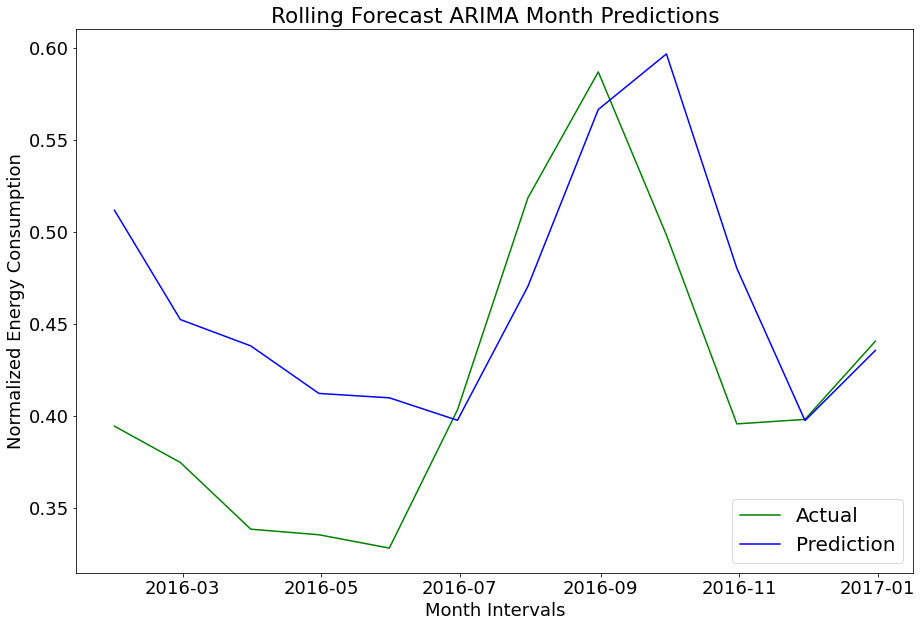

In [11]:
#Monthly Forecasting
month_model, month_pred, month_rmse = model_rolling_forecast(month_test, month_train)
month_arima = month[24:]
month_arima['arima'] = month_pred.tolist()
plot_ARIMA(month_arima, 'month')

# <center> Weekly Predictions

In [12]:
#Split data, 157 weeks total
week_train = week.values[0:105].tolist()
week_test = week.values[105:]

Test RMSE: 0.09689502956401753


/var/folders/kn/v58htfb13v3b7_c6dcyc8r2m0000gn/T/ipykernel_73297/1670435734.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_arima['arima'] = week_pred.tolist()


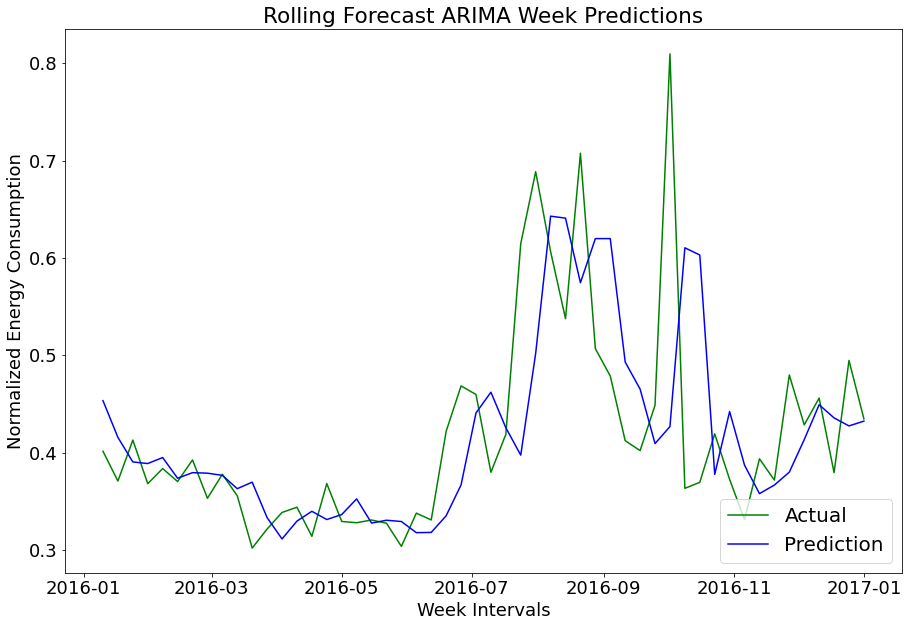

In [13]:
#Weekly Forecasting
week_model, week_pred, week_rmse = model_rolling_forecast(week_test, week_train)
week_arima = week[105:]
week_arima['arima'] = week_pred.tolist()
plot_ARIMA(week_arima, 'week')

# <center> Daily Predictions

In [14]:
#Split data, 1096 days total
day_train = day.values[0:731].tolist()
day_test = day.values[731:]

/Users/davisgiles/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/davisgiles/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/davisgiles/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 0.07087656663755618


/var/folders/kn/v58htfb13v3b7_c6dcyc8r2m0000gn/T/ipykernel_73297/1445509071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_arima['arima'] = day_pred.tolist()


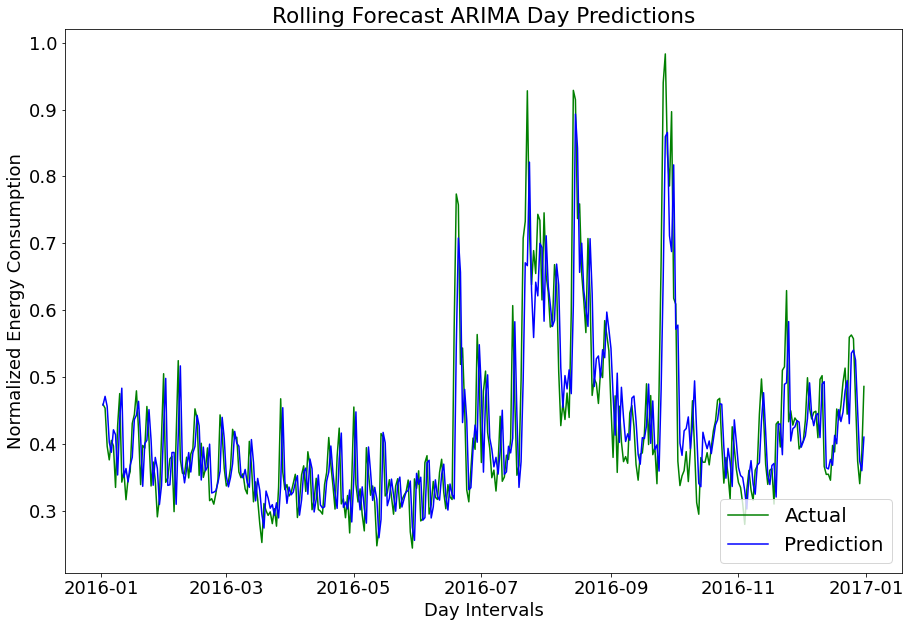

In [15]:
#Daily Forecasting
day_model, day_pred, day_rmse = model_rolling_forecast(day_test, day_train)
day_arima = day[731:]
day_arima['arima'] = day_pred.tolist()
plot_ARIMA(day_arima, 'day')

# Hourly and 15-minute predictions were not performed due to long runtimes.